In [1]:
# Import statements
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
import pandas as pd
from statsmodels.tsa.stattools import acf
from scipy.interpolate import interp1d

In [2]:
betat = lambda x: [0.4002]*len(x)
p = (0.4002-0.05)/100
tau = 30
def beta_increasing_t(t):
    betat = 0.05+p*(t-tau) if t > tau else 0.05
    if betat >= 0.4002:
        return 0.4002
    else:
        return betat

def beta_decreasing_t(t):
    betat = 0.4002-p*(t-tau) if t > tau else 0.4002
    if betat <= 0.05:
        return 0.05
    else:
        return betat

def beta_step_t(t):
    return 0.4002 if t<tau else 0.05

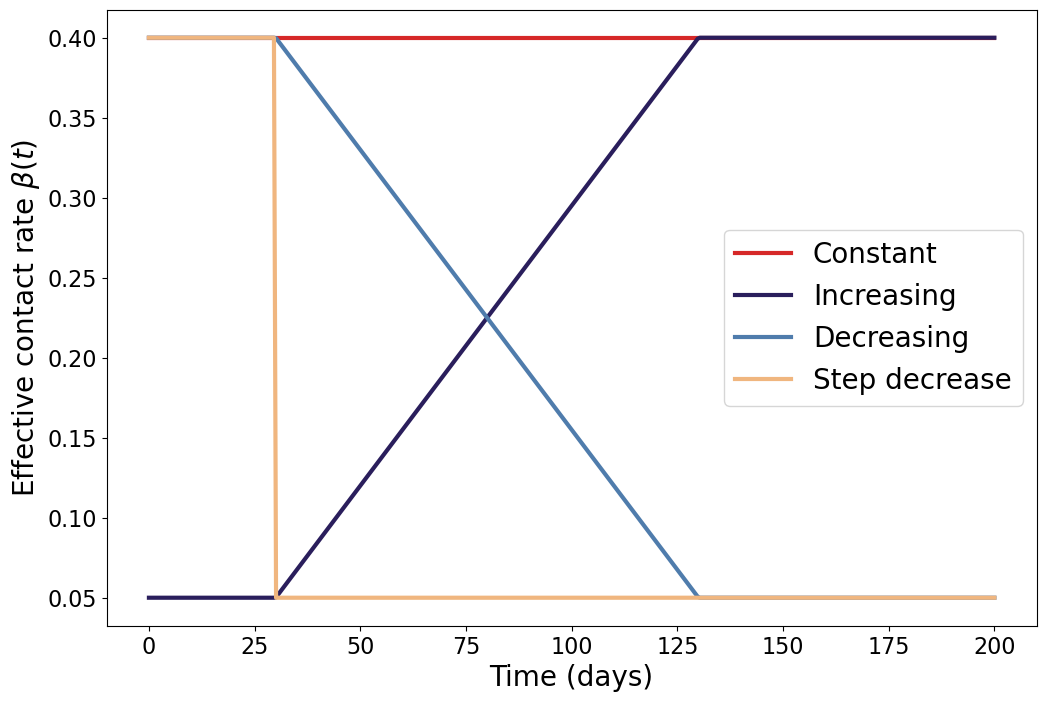

In [4]:
fig, axis = plt.subplots(figsize=(12,8))
ts = np.linspace(0,200,400)
axis.plot(ts,betat(ts),label='Constant',lw=3,color='#D62828')
axis.plot(ts,[beta_increasing_t(t) for t in ts],lw=3,label='Increasing',color='#2A1E5C')
axis.plot(ts,[beta_decreasing_t(t) for t in ts],lw=3,label='Decreasing',color='#4F7CAC')
axis.plot(ts,[beta_step_t(t) for t in ts],lw=3,label='Step decrease',color='#F0B67F')
axis.set_ylabel(r'Effective contact rate $\beta(t)$',fontsize=20)
axis.set_xlabel('Time (days)', fontsize = 20)
axis.tick_params(axis='x', labelsize=16)
axis.tick_params(axis='y', labelsize=16)
axis.legend(fontsize=20)
plt.savefig('Figures/scenarios.pdf',dpi=1200)